### **K-Means Algorithm Implementation**

This notebook demonstrates the implementation of the K-Means clustering algorithm using the Iris dataset. We will explore the steps involved, visualize the clusters, and use the Elbow Method to determine the optimal number of clusters.

#### **1. Import Libraries**

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

#### **2. Load the Iris Dataset**

In [3]:
iris = load_iris()

#### **3. Create a DataFrame**
We load the Iris dataset into a pandas DataFrame for easier manipulation and visualization.

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### **4. Add Target Labels (Flower Types)**
The target column is added to the DataFrame to compare the actual labels with clusters later.

In [5]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### **5. Drop Unnecessary Columns**
We will drop some columns (e.g., `sepal length`, `sepal width`, and target label) to focus on clustering based on `petal length` and `petal width`. These features are more discriminative for clustering.

In [6]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis='columns', inplace=True)
df.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


#### **6. Apply K-Means Clustering**
Using the K-Means algorithm, we group the data into 3 clusters and predict cluster assignments.

In [7]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### **7. Verify Cluster Assignments**

In [8]:
yp[50:100]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

#### **8. Add Clusters to the DataFrame**
Add a `cluster` column to the DataFrame to analyze cluster assignments.

In [9]:
df['cluster'] = yp
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


#### **9. Check Unique Clusters**
Verify the unique clusters created by the algorithm.

In [10]:
df.cluster.unique()

array([1, 2, 0], dtype=int32)

#### **10. Separate Clusters for Visualization**
Create separate DataFrames for each cluster to plot them individually.

In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

#### **11. Visualize Clusters**
Visualize the clusters using a scatter plot with `petal length` and `petal width`.

Text(0.5, 1.0, 'K-Means Clustering')

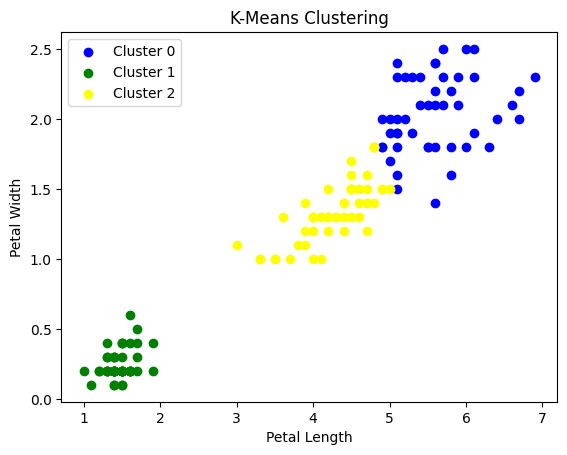

In [12]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', label='Cluster 0')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green', label='Cluster 1')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='yellow', label='Cluster 2')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.title('K-Means Clustering')

### **Elbow Method for Optimal K**

The Elbow Method is used to determine the optimal number of clusters by evaluating the Sum of Squared Errors (SSE) for different values of `k`. The point where SSE starts to diminish significantly is considered the optimal `k`. 

#### **1. Calculate Sum of Squared Errors (SSE)**

In [13]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

#### **2. Plot Elbow Curve**
Visualize the SSE values for different numbers of clusters to identify the optimal `k`. 

Text(0.5, 1.0, 'Elbow Method for Optimal K')

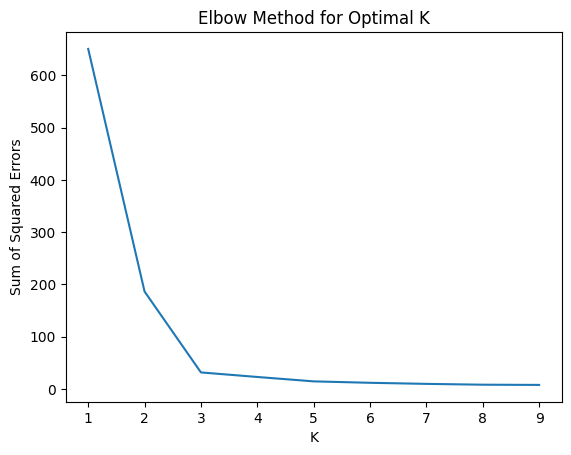

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng, sse)
plt.title('Elbow Method for Optimal K')